In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from numpy import mean,std
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,plot_confusion_matrix
import matplotlib.pyplot as plt

### Random Forest is Bagging technique which works on Bootstrap Aggregation which means it does row subsampling with replacement and feature subsampling, which eliminates the need to do feature engeneering
### Random Forest doesnot need any kind of scaling of data
### Random forest can handle missing or null values
### Random forest is robust to outliers

### Loading Data

In [34]:
data = pd.read_csv('../Datasets/oversampled_data.csv')
del data['Unnamed: 0']
data.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


### Separtiing X and y

In [35]:
X = data.drop(labels='churn',axis=1)
y = data[['churn']]
X.shape,y.shape

((5700, 18), (5700, 1))

### Train Test Split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=12,stratify=y)

### Model cross Validation

In [37]:
folds = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=12)

scores = cross_val_score(estimator=RandomForestClassifier(),X=X,y=y,scoring='accuracy',n_jobs=-1,cv=folds,error_score='raise')

print('Accuracy: %.3f STD %.3f' % (mean(scores), std(scores)))


Accuracy: 0.999 STD 0.001


### Base model 
#### Model building and fiting

In [38]:
base_model = RandomForestClassifier()

In [39]:
base_model.fit(x_train,y_train)

RandomForestClassifier()

#### Model testing and evaluation with train data

In [40]:
y_train_pred = base_model.predict(x_train)

In [41]:
train_accuracy = round(accuracy_score(y_train,y_train_pred)*100,2)
train_precision = round(precision_score(y_train,y_train_pred)*100,2)
tran_recall = round(recall_score(y_train,y_train_pred)*100,2)
print('Traning : Accuracy {}, Precision {} ,Recall {}'.format(train_accuracy,train_precision,tran_recall))

Traning : Accuracy 100.0, Precision 100.0 ,Recall 100.0


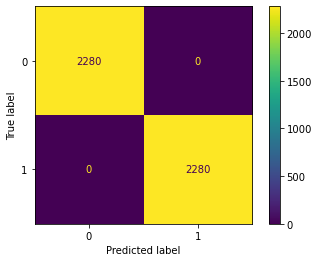

In [47]:
plot_confusion_matrix(base_model,x_train,y_train)
plt.show()

#### Model Testing and evaluation using Test Data

In [43]:
y_test_pred = base_model.predict(x_test)

In [44]:
test_accuracy = round(accuracy_score(y_test,y_test_pred)*100,2)
test_precision = round(precision_score(y_test,y_test_pred)*100,2)
test_recall = round(recall_score(y_test,y_test_pred)*100,2)
print('Traning : Accuracy {}, Precision {} ,Recall {}'.format(test_accuracy,test_precision,test_recall))

Traning : Accuracy 99.91, Precision 100.0 ,Recall 99.82


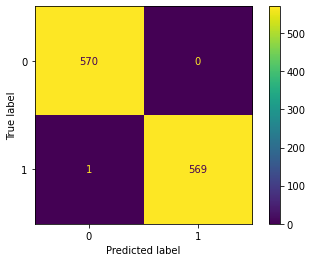

In [48]:
plot_confusion_matrix(base_model,x_test,y_test)
plt.show()

### When tweeking class weights to handle imbalance
### As you see Recall is less, which means 15 customers are going to get churned but we are predicting  they wont get churned, so we might loose these customers and we wont be able to do anything beforehand
### So it is important to decreace this value of False Negative i.e we need to increase Recall
### When using class weinghts to  balance the dataset, racall rates were low, but when using oversampled data, recall rates were good, so switching to oversampled data to handle imbalance
### when decreasing tree depth to handle oevrfiting, the recall values dereases ,which we do not want